In [1]:
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

     |████████████████████████████████| 968 kB 7.9 MB/s 
     |████████████████████████████████| 138 kB 45.7 MB/s 
     |████████████████████████████████| 359 kB 47.1 MB/s 
     |████████████████████████████████| 55 kB 3.7 MB/s 
     |████████████████████████████████| 3.6 MB 52.4 MB/s 
     |████████████████████████████████| 58 kB 5.4 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.9 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.down

In [2]:
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

from selenium import webdriver
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt 
import pandas as pd
import re

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: use options instead of chrome_options
  


In [3]:
def findAge(bsoup):
  result = bsoup.find_all("td", {"class" : "infobox-data"})

  data = []
  for i in result:
    if('age' in i.text):
      raw_age = i.text
      raw_age = raw_age.split('age')[-1]
      raw_age = raw_age.split(')')[0]
      age = re.sub(r'[^0-9]', '', raw_age)
      return age
  return None

In [4]:
df = pd.read_csv("Quote.csv")
df

,Tacgia,Link,Namsinh,Quote
0,Albert Einstein,/author/Albert-Einstein,"March 14, 1879",The world as we have created it is a process o...
1,J.K. Rowling,/author/J-K-Rowling,"July 31, 1965",It is our choices Harry that show what we trul...
2,Albert Einstein,/author/Albert-Einstein,"March 14, 1879",There are only two ways to live your life One ...
3,Jane Austen,/author/Jane-Austen,"December 16, 1775",The person be it gentleman or lady who has not...
4,Marilyn Monroe,/author/Marilyn-Monroe,"June 01, 1926",Imperfection is beauty madness is genius and i...
...,...,...,...,...
95,Harper Lee,/author/Harper-Lee,"April 28, 1926",You never really understand a person until you...
96,Madeleine L'Engle,/author/Madeleine-LEngle,"November 29, 1918",You have to write the book that wants to be wr...
97,Mark Twain,/author/Mark-Twain,"November 30, 1835",Never tell the truth to people who are not wor...
98,Dr. Seuss,/author/Dr-Seuss,"March 02, 1904",A persons a person no matter how small


In [5]:
def findRowAuthorByName(name, df):
  return df.loc[df['Tacgia'] == name]

In [6]:
#Lấy trường tuổi
age_list = []
for i in df['Tacgia']:
  if(i == 'André_Gide'):
    wd.get('https://en.wikipedia.org/wiki/Andr%C3%A9_Gide')
    bsoup = BeautifulSoup(wd.page_source, 'html.parser')
  elif(i == 'William Nicholson'):
    wd.get('https://en.wikipedia.org/wiki/William_Nicholson_(writer)')
    bsoup = BeautifulSoup(wd.page_source, 'html.parser')
  else:
    wd.get('https://en.wikipedia.org/wiki/' + i)
    bsoup = BeautifulSoup(wd.page_source, 'html.parser')

  age_list.append(findAge(bsoup))

df['Tuoi'] = age_list
df

76
56
76
41
36
76
81
84
78
76
36
56
76
36
87
49
87
55
74
86
69
78
87
79
53
87
76
56
76
36
87
56
36
87
56
77
74
76
86
61
73
64
36
36
76
36
36
39
56
63
41
78
36
76
73
71
48
61
87
94
73
59
59
64
81
56
61
78
74
87
83
73
66
87
91
71
40
66
77
74
76
41
56
41
41
64
64
74
74
64
56
27
77
67
57
89
88
74
87
73


,Tacgia,Link,Namsinh,Quote,Tuoi
0,Albert Einstein,/author/Albert-Einstein,"March 14, 1879",The world as we have created it is a process o...,76
1,J.K. Rowling,/author/J-K-Rowling,"July 31, 1965",It is our choices Harry that show what we trul...,56
2,Albert Einstein,/author/Albert-Einstein,"March 14, 1879",There are only two ways to live your life One ...,76
3,Jane Austen,/author/Jane-Austen,"December 16, 1775",The person be it gentleman or lady who has not...,41
4,Marilyn Monroe,/author/Marilyn-Monroe,"June 01, 1926",Imperfection is beauty madness is genius and i...,36
...,...,...,...,...,...
95,Harper Lee,/author/Harper-Lee,"April 28, 1926",You never really understand a person until you...,89
96,Madeleine L'Engle,/author/Madeleine-LEngle,"November 29, 1918",You have to write the book that wants to be wr...,88
97,Mark Twain,/author/Mark-Twain,"November 30, 1835",Never tell the truth to people who are not wor...,74
98,Dr. Seuss,/author/Dr-Seuss,"March 02, 1904",A persons a person no matter how small,87


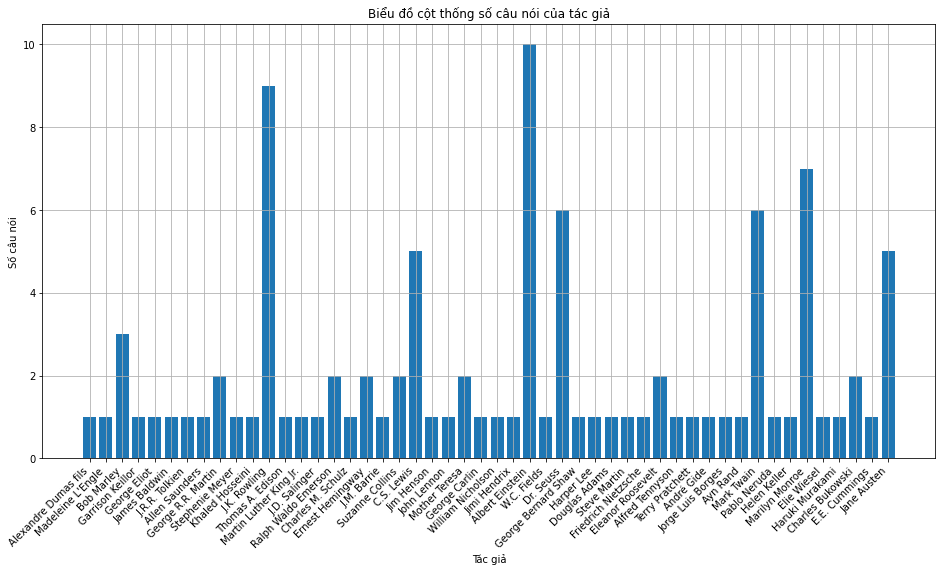

In [39]:
group_author_quote = {}
for i in set(df['Tacgia']):
  count_quote = 0
  quote = findRowAuthorByName(i, df)['Quote'].values
  group_author_quote[i] = len(quote)


plt.figure(figsize=(16, 8))

x = group_author_quote.keys()
y = [group_author_quote[key] for key in group_author_quote.keys()]

plt.bar(x, y)
plt.title('Biểu đồ cột thống số câu nói của tác giả')
plt.xlabel("Tác giả")
plt.ylabel("Số câu nói")
plt.xticks(rotation=45, ha='right')
plt.grid(True)

plt.show()

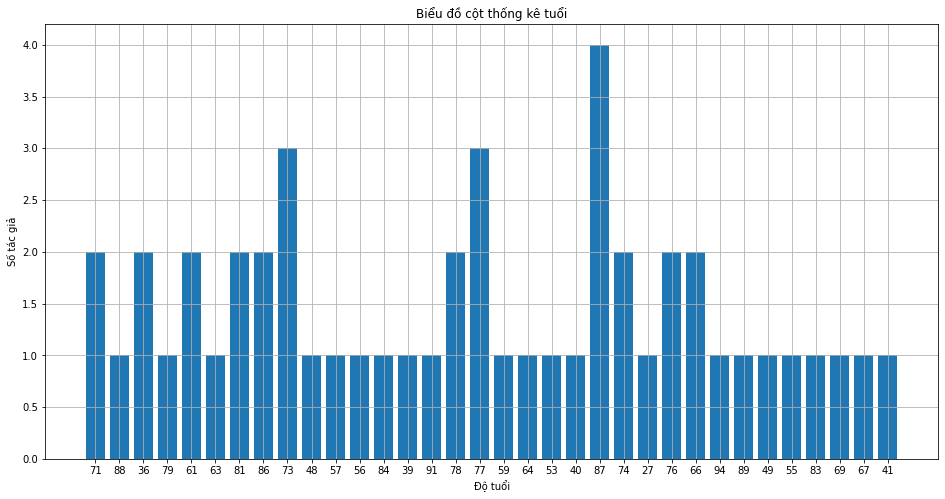

In [40]:
group_age = {}

for i in set(df['Tacgia']):
  age = findRowAuthorByName(i, df)[0:1]['Tuoi'].values[0]
  if age not in group_age.keys():
    group_age[age] = 1
  else:
    group_age[age] += 1

plt.figure(figsize=(16, 8))

x = group_age.keys()
y = [group_age[key] for key in group_age.keys()]

plt.bar(x, y)
plt.title('Biểu đồ cột thống kê tuổi')
plt.xlabel("Độ tuổi")
plt.ylabel("Số tác giả")
plt.grid(True)

plt.show()

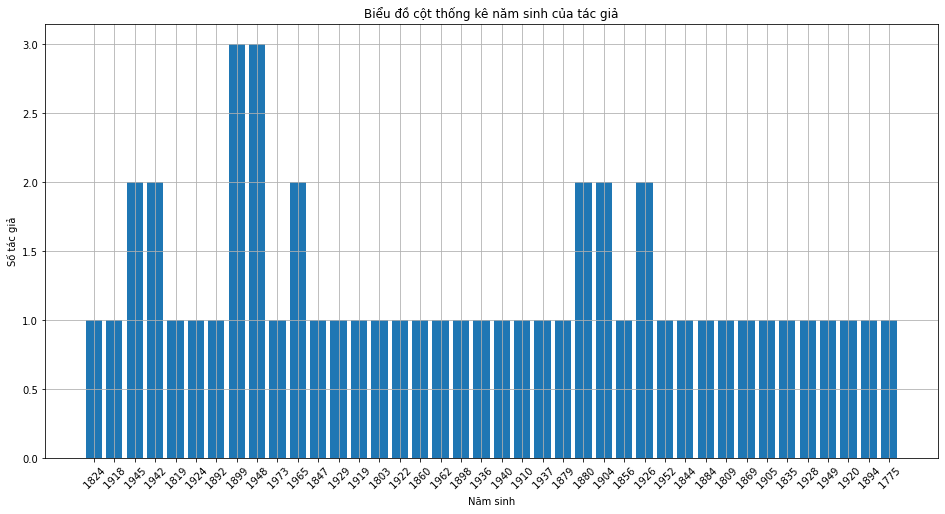

In [41]:
group_birthday = {}

for i in set(df['Tacgia']):
  birthday = findRowAuthorByName(i, df)[0:1]['Namsinh'].values[0].split(',')[1]
  if birthday not in group_birthday.keys():
    group_birthday[birthday] = 1
  else:
    group_birthday[birthday] += 1


plt.figure(figsize=(16, 8))

x = group_birthday.keys()
y = [group_birthday[key] for key in group_birthday.keys()]

plt.bar(x, y)
plt.title('Biểu đồ cột thống kê năm sinh của tác giả')
plt.xlabel("Năm sinh")
plt.xticks(rotation=45)
plt.ylabel("Số tác giả")
plt.grid(True)

plt.show()

In [49]:
max_quote = len(df['Quote'][0].split(' '))
min_quote = len(df['Quote'][0].split(' '))
words = 0
vocabulary = []

for quote in df['Quote']:
  vocabulary += quote.split(' ')
  len_quote = len(quote.split(' '))
  words += len_quote
  if len_quote > max_quote:
    max_quote = len_quote
  if len_quote < min_quote:
    min_quote = len_quote

print('Số từ trong câu dài nhất: ')
print(max_quote)
print('Số từ trong câu ngắn nhất: ')
print(min_quote)
print('Số từ: ')
print(words)
print('Số từ vựng: ')
print(len(list(set(vocabulary))))

Số từ trong câu dài nhất: 
201
Số từ trong câu ngắn nhất: 
7
Số từ: 
2363
Số từ vựng: 
726


In [ ]:
from nltk.probability import FreqDist
import seaborn

seaborn.set_style(style='white')
# trả về dictionary các từ vựng và số lần xuất hiện
fdist_filtered = FreqDist(words)
fdist_filtered.plot(30, title='Top 30 từ vựng được sử dụng nhiều nhất'


In [56]:
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('stopwords')
string.punctuation
stopwords = nltk.corpus.stopwords.words('english')

# loại bỏ các ký tự không phải chữ
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

# tách câu thành các từ
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens

# loại bỏ các từ không đóng góp nhiều ý nghĩa
def remove_stopwords(text):
    text = text[0].split(" ")
    output= [i for i in text if i not in stopwords]
    output = ' '.join([str(item) for item in output])
    return output

df["Quote"] = df['Quote'].apply(lambda x:remove_punctuation(x))
df['Quote'] = df['Quote'].apply(lambda x: x.lower())
df['Quote_DaTienXuLi'] = df['Quote'].apply(lambda x: tokenization(x))
df['Quote_DaTienXuLi']= df['Quote_DaTienXuLi'].apply(lambda x:remove_stopwords(x))


#Thuật toán BOW
vectorizer = CountVectorizer()
vec_list = vectorizer.fit_transform(df['Quote_DaTienXuLi'])
vector_array = vec_list.toarray()
labels = df['Tacgia']

print(vector_array)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
